## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
sns.set_style("darkgrid") #Setting the style as darkgrid

## Loading Dataset

### Spotify API Reference
https://developer.spotify.com/documentation/web-api/reference/get-audio-features

In [3]:
df = pd.read_csv('data.csv')

In [ ]:
df 

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


In [5]:
#Droping the column as it same as index value and not important for the analysis

df.drop("Unnamed: 0", axis=1, inplace=True)

In [6]:
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


 ## Data Cleaning

In [7]:
#Checking for missing values

df.isna().sum() 

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [8]:
df.info() #Print a concise summary of a DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

In [9]:
df.shape  #Dimensionality of the DataFrame.

(2017, 16)

In [68]:
df.size 

32272

In [10]:
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [12]:
df.describe() #Generating descriptive statistics

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


## Data Analysis

### Top 5 most popular artists

In [13]:
top_five_artists = df.groupby("artist").count().sort_values(by = "song_title", ascending = False)["song_title"][:5]
top_five_artists

artist
Drake              16
Rick Ross          13
Disclosure         12
Backstreet Boys    10
WALK THE MOON      10
Name: song_title, dtype: int64

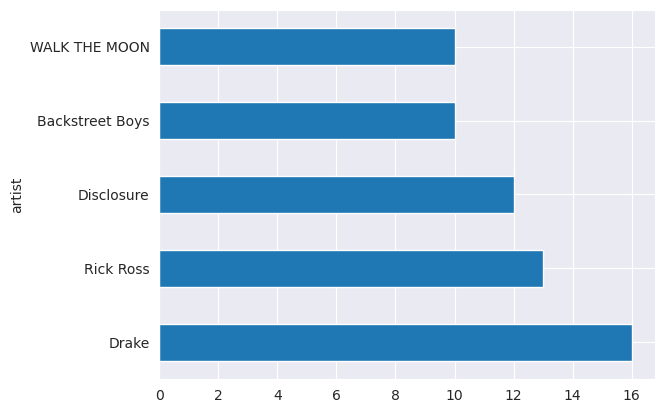

In [14]:
top_five_artists.plot.barh()
plt.show()


## Top 5 loudest tracks

In [15]:
top_five_loudest_tracks =  df[["loudness", "song_title"]].sort_values(by = "loudness", ascending =  True)[:5]
top_five_loudest_tracks

,loudness,song_title
1594,-33.097,"Lyric Pieces, Book I Op. 12: I. Arietta"
1596,-31.367,"8 Fantasiestücke, Op.12 : 1. Des Abends"
1598,-31.082,"Piano Quartet in E flat, Op.47: 3. Andante can..."
1531,-30.447,"I Was So Young, and You Were So Beautiful"
1549,-29.460,Eleanor


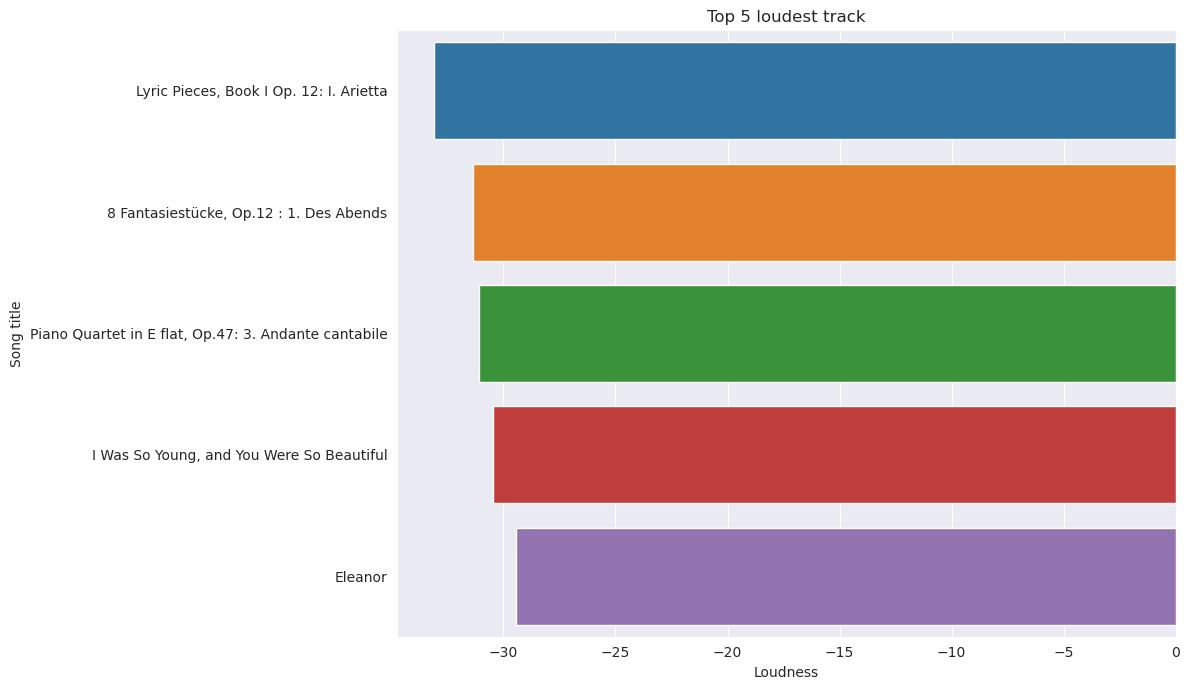

In [16]:
plt.figure(figsize = (12,7))
sns.barplot(x ="loudness", y = "song_title", data = top_five_loudest_tracks )
plt.title("Top 5 loudest track")
plt.xlabel("Loudness")
plt.ylabel("Song title")
plt.tight_layout()
plt.savefig("top_five_loudest_tracks.png")
plt.show()

#More negative in values means the loudest

## Artist with the most danceability song

In [17]:
top_five_artists_danceable_songs = df[["danceability","song_title","artist"]].sort_values(by = "danceability", ascending =  False)[:5]
top_five_artists_danceable_songs

,danceability,song_title,artist
1433,0.984,Flashwind - Radio Edit,Ben Remember
1901,0.967,SexyBack,Justin Timberlake
604,0.962,Check Me Out Like,Blaqstarr
32,0.959,Best Friend,Young Thug
1957,0.959,Ice Ice Baby,Vanilla Ice


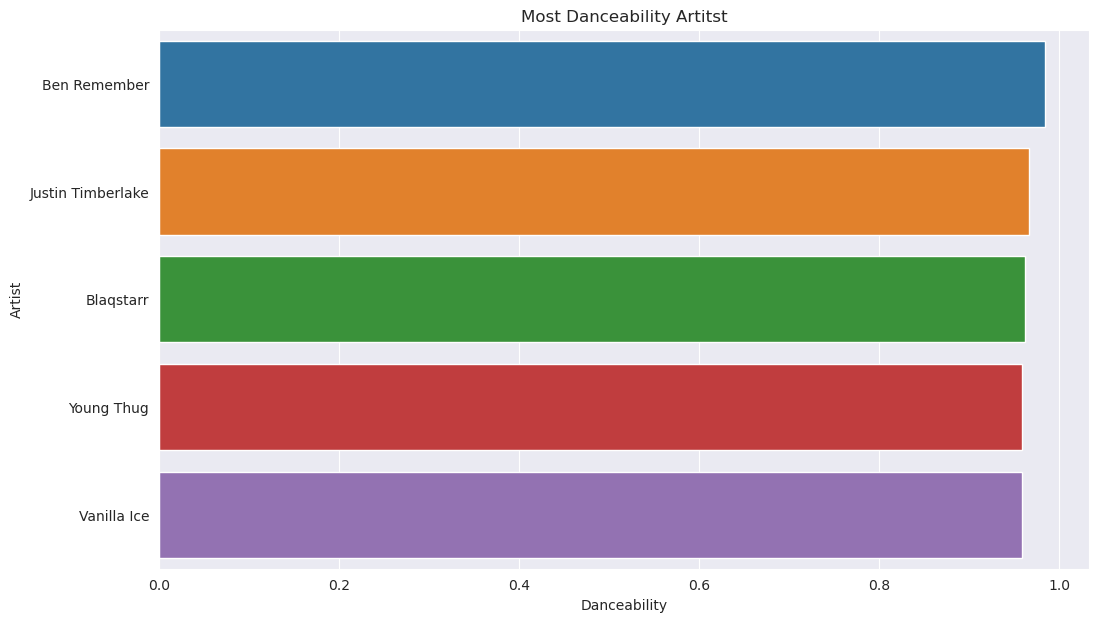

In [18]:
plt.figure(figsize = (12,7))
sns.barplot(x ="danceability", y = "artist", data = top_five_artists_danceable_songs)
plt.title("Most Danceability Artitst")
plt.xlabel("Danceability")
plt.ylabel("Artist")
plt.savefig("Most Danceability Artitst")
plt.xlabel("Danceability")
plt.show()


#Closer to 1 mean highest and vice versa

## Top 10 instrumental tracks

In [19]:
top_ten_instrumental_tracks = df[["instrumentalness", "song_title", "artist"]].sort_values(by = "instrumentalness", ascending =  False)[:5]
top_ten_instrumental_tracks

,instrumentalness,song_title,artist
1313,0.976,Senseless Order,Signs of the Swarm
271,0.968,So Destroyed (channeling Rage Peace),Prince Rama
1575,0.964,A Hundred Dreams from Now,Ray Bryant
1619,0.958,Raven,John Dahlbäck
725,0.957,Strandbar (disko),Todd Terje


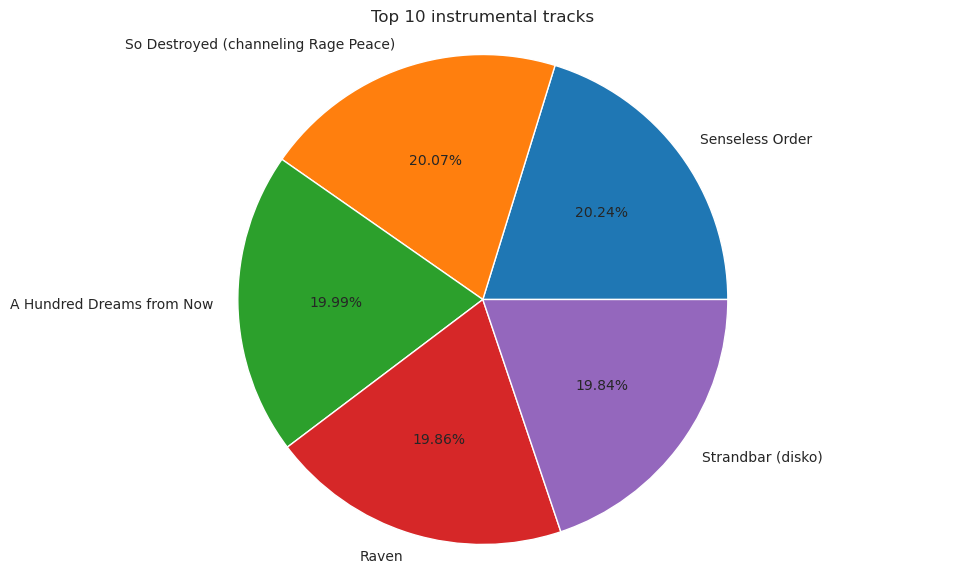

In [20]:
plt.figure(figsize = (12,7))
plt.pie("instrumentalness", data = top_ten_instrumental_tracks, autopct = '%1.2f%%', labels = top_ten_instrumental_tracks.song_title)
plt.title("Top 10 instrumental tracks")
plt.axis('equal')
plt.savefig("Top 10 instrumental tracks")
plt.show()


## Multiple feature Plots

In [21]:
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [22]:
Interested_features = ['tempo','loudness','acousticness','danceability','duration_ms','energy','instrumentalness',
                      'liveness','speechiness','valence']

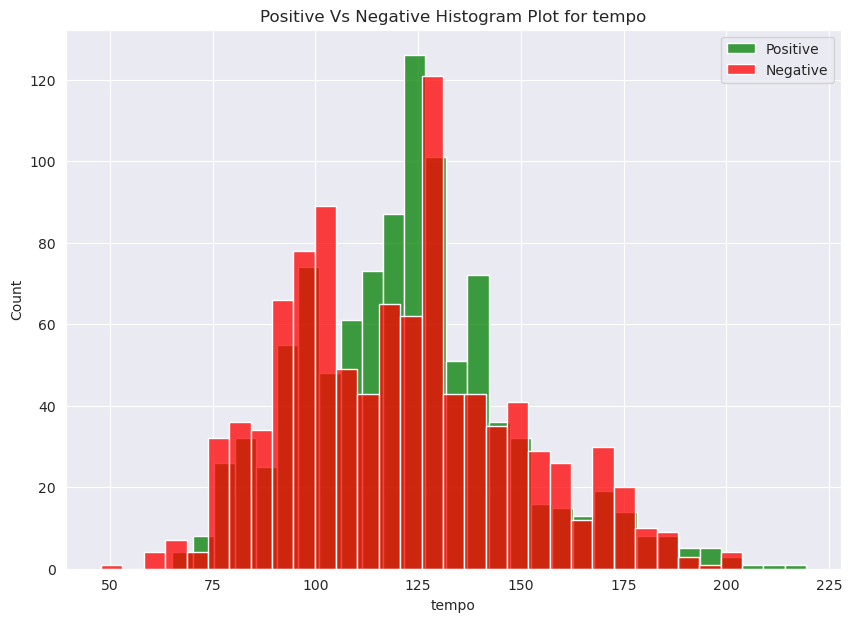

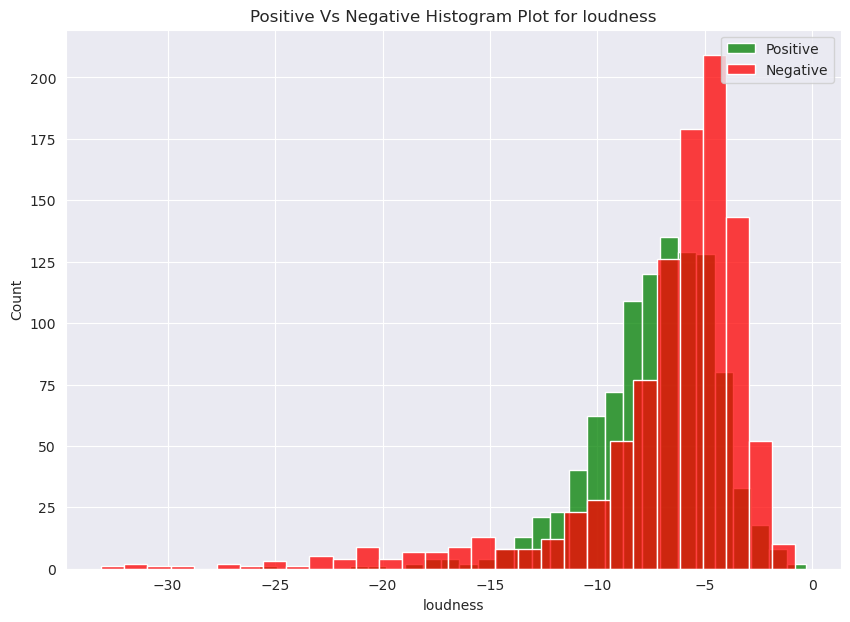

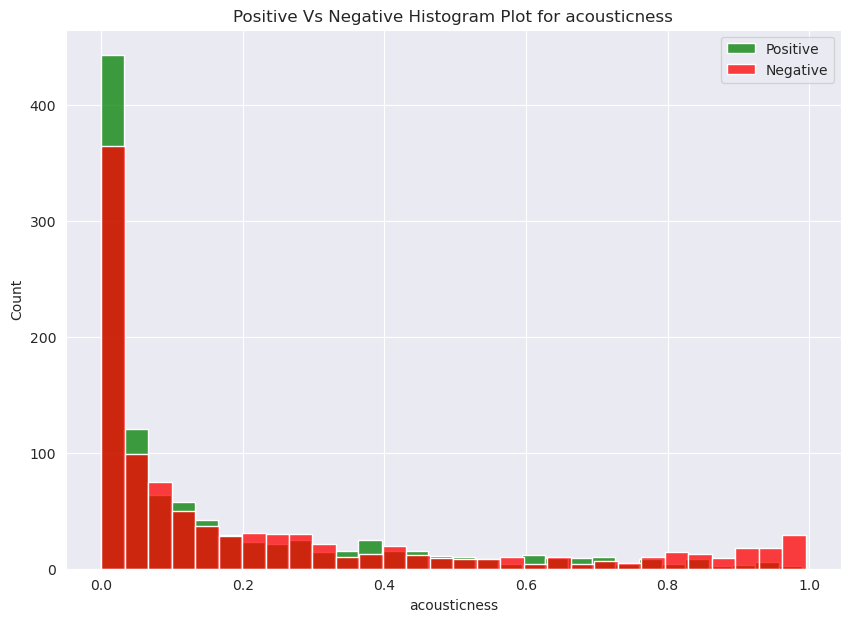

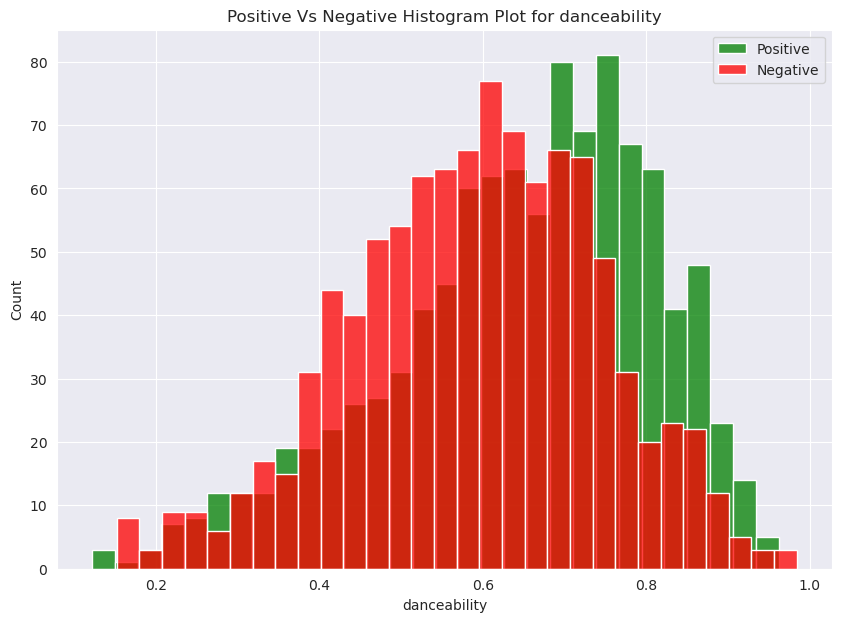

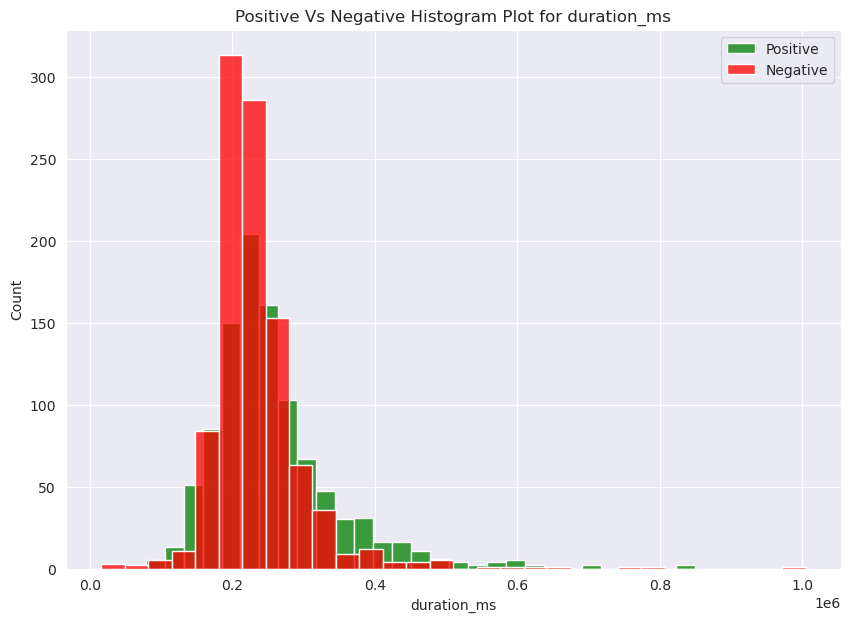

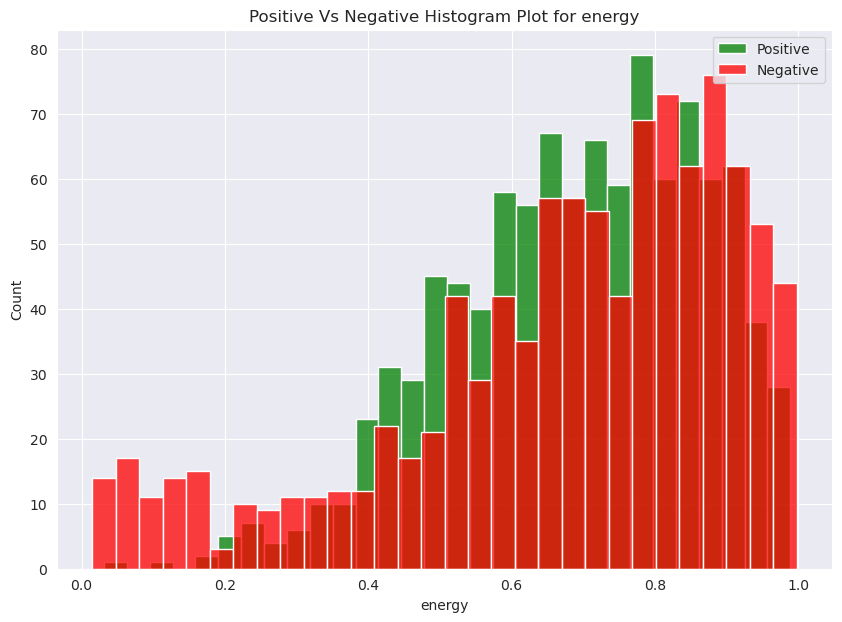

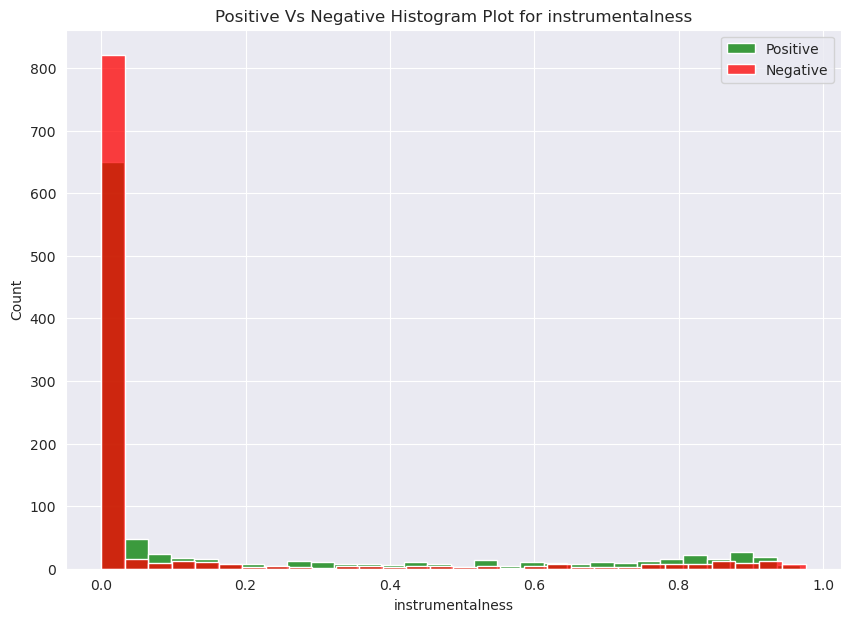

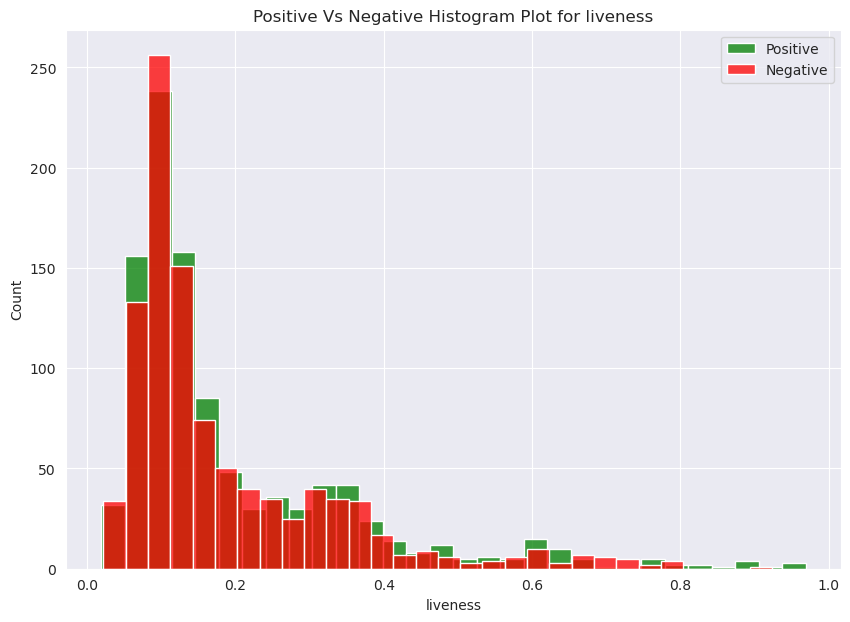

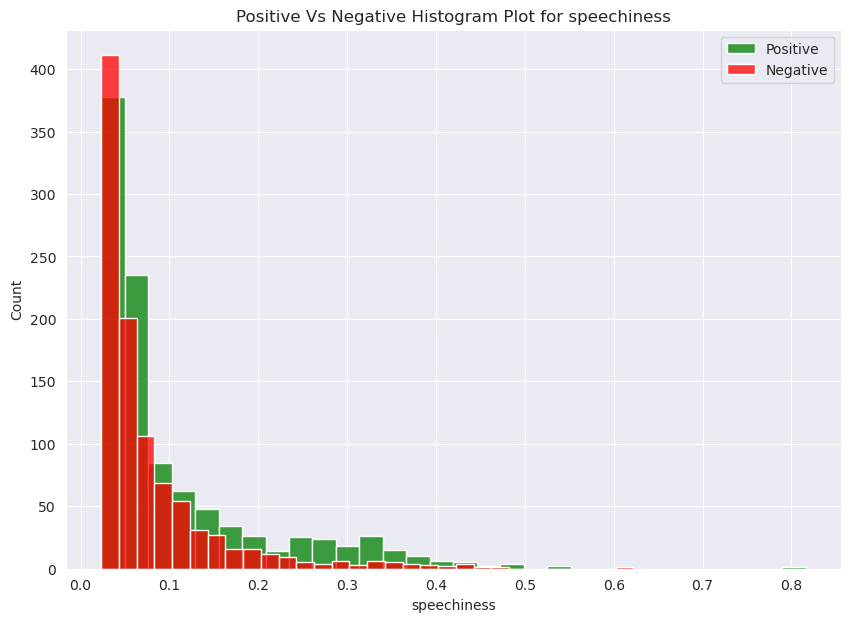

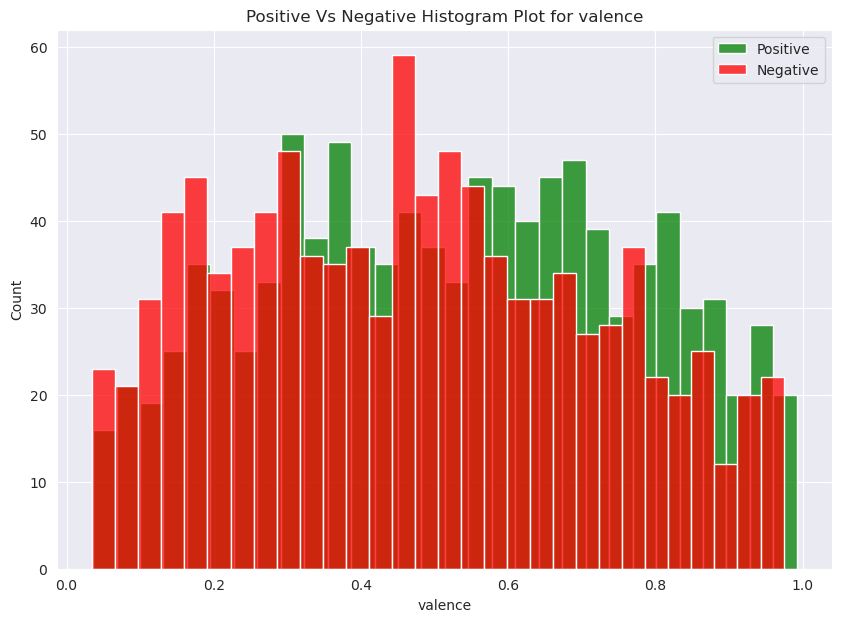

In [23]:
#Using a for loop to plot visuals for all interested features

for feature_col in Interested_features:
    positive_data = df[df["target"]==1] [feature_col]
    negative_data = df[df["target"]==0] [feature_col]
    
    plt.figure(figsize = (10,7)) # Giving dimensions for the figures
    
    sns.histplot(positive_data, bins = 30, label = "Positive", color = "green") #Giving features
    sns.histplot(negative_data, bins = 30, label = "Negative", color = "red")
    
    #sns.distplot(positive_data, bins = 30, label = "Positive", color = "green",kde=True) #Giving features
    #sns.distplot(negative_data, bins = 30, label = "Negative", color = "red",kde=True)
   
    
    #Decorating the figures/Graphs
    plt.legend(loc = "upper right")
    plt.title(f"Positive Vs Negative Histogram Plot for {feature_col}") 
    plt.show()

## Most Trending Genre

In [24]:
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [25]:
Most_trending_genre =  df[["artist", "song_title"]].sort_values(by = "artist", ascending =  True)[:5]
Most_trending_genre

,artist,song_title
388,!!!,Slyd
1739,*NSYNC,Pop - Radio Version
1740,*NSYNC,Tearin' up My Heart - Radio Edit
1738,*NSYNC,I Want You Back - Radio Edit
1737,*NSYNC,God Must Have Spent a Little More Time on You ...


## Top 10 tracks with most valence

In [26]:
top_tracks_valence = df[["valence", "song_title"]].sort_values(by = "valence", ascending =  False)[:10]

"""
Describing the musical positiveness conveyed by a track. 
Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
Example value: 0.428
Range: 0 - 1

"""

top_tracks_valence

,valence,song_title
460,0.992,Abataka - Original Mix
912,0.975,I'm Walkin' - 2002 Digital Remaster
1966,0.974,"To Roz Bikini (Itsy, Bitsy, Teenie, Weenie)"
207,0.973,Look at You
48,0.973,Azon de ma gnin kpevi
337,0.972,Let's Lovedance Tonight - Danny Krivit Re-edit...
1590,0.972,Jelly On A Plate
838,0.971,Let's Lovedance Tonight - Danny Krivit Re-edit...
497,0.968,Mi Swing es Tropical
112,0.967,Please Mr. Postman


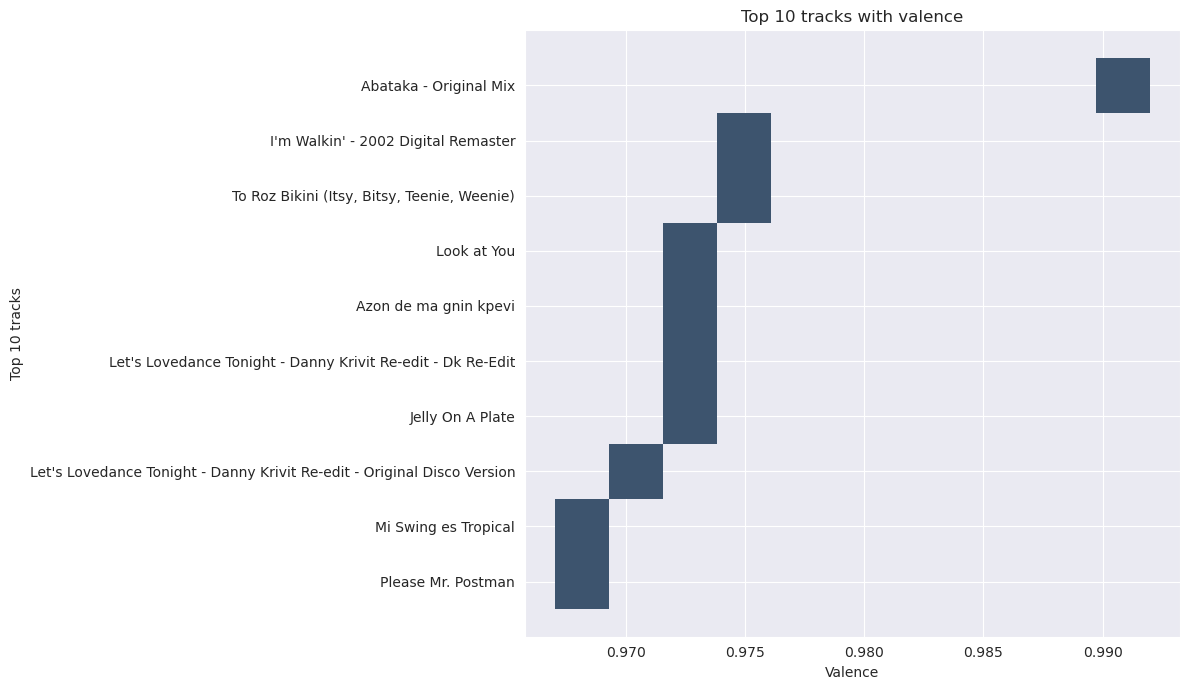

In [27]:
plt.figure(figsize = (12,7))
sns.histplot(y ="song_title", x = "valence", data = top_tracks_valence)
plt.title("Top 10 tracks with valence")
plt.ylabel("Top 10 tracks")
plt.xlabel("Valence")
plt.tight_layout()
plt.savefig("top_tracks_valence.png")
plt.show()

## Top 10 energetic & Least energetic tracks

In [28]:
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [29]:
top_energetic_tracks = df [["song_title", "energy"]].sort_values(by = "energy", ascending =  False)[:10]

"""
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. 
Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.

"""

top_energetic_tracks


,song_title,energy
1299,No Absolution,0.998
1322,Pitchblack,0.997
1297,A Darkened Gospel,0.994
1347,Unanswered,0.993
2015,First Contact,0.992
1680,Paranoia,0.992
1332,Beautiful Agony,0.992
1328,Down into the Abyss,0.991
1681,Hated,0.990
1296,Black Colors,0.990


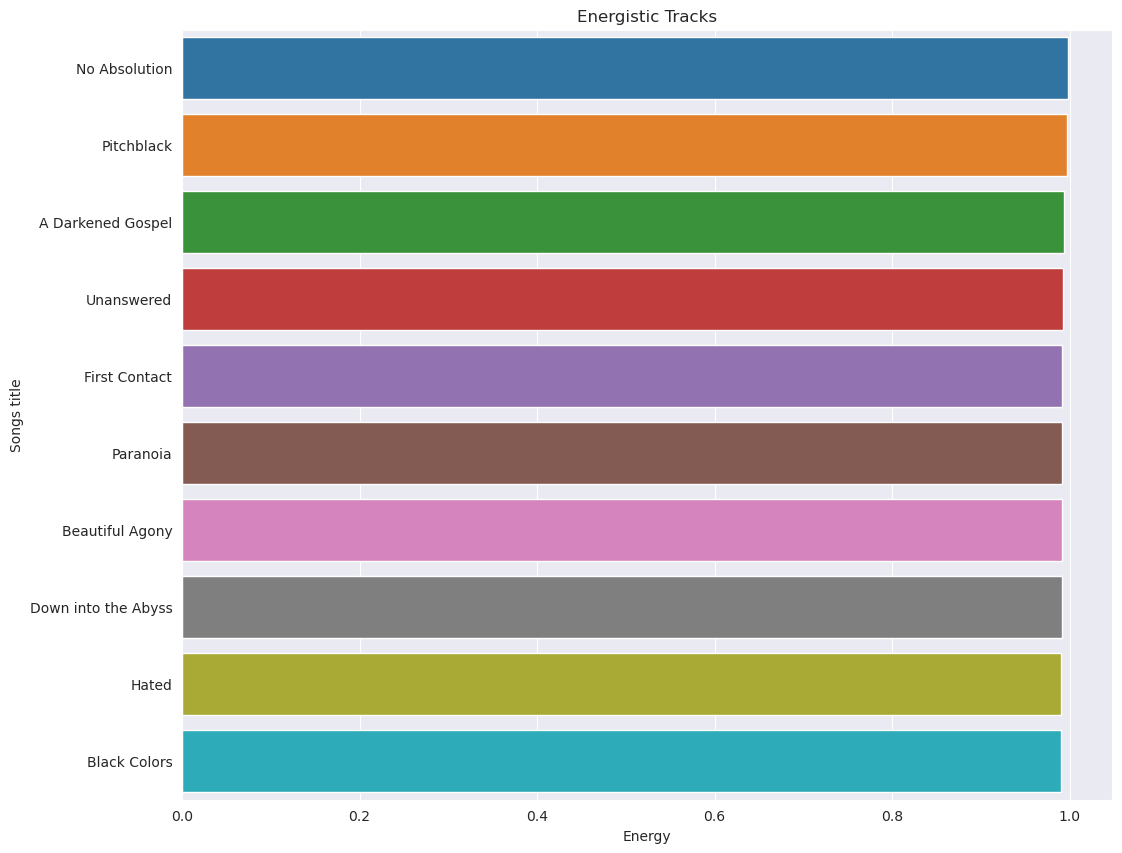

In [30]:
plt.figure(figsize = (12,10))
sns.barplot(x = "energy", y = "song_title", data = top_energetic_tracks)
plt.title('Energistic Tracks')
plt.xlabel('Energy')
plt.ylabel('Songs title')
plt.show()


In [31]:
top_least_energetic_tracks = df [["song_title", "energy"]].sort_values(by = "energy", ascending =  True)[:10]
top_least_energetic_tracks

,song_title,energy
1594,"Lyric Pieces, Book I Op. 12: I. Arietta",0.0148
1595,"String Quartet No. 4 in C Major, D. 46: II. An...",0.0156
1537,Blue in Green,0.0161
1598,"Piano Quartet in E flat, Op.47: 3. Andante can...",0.0230
1596,"8 Fantasiestücke, Op.12 : 1. Des Abends",0.0288
1545,Blue and Sentimental,0.0291
1530,I'm a Fool to Want You,0.0295
1531,"I Was So Young, and You Were So Beautiful",0.0302
817,"Mozart: Requiem in D Minor, K. 626: VIII. Lacr...",0.0310
1876,"Nocturne No.1 In B Flat Minor, Op.9 No.1",0.0347


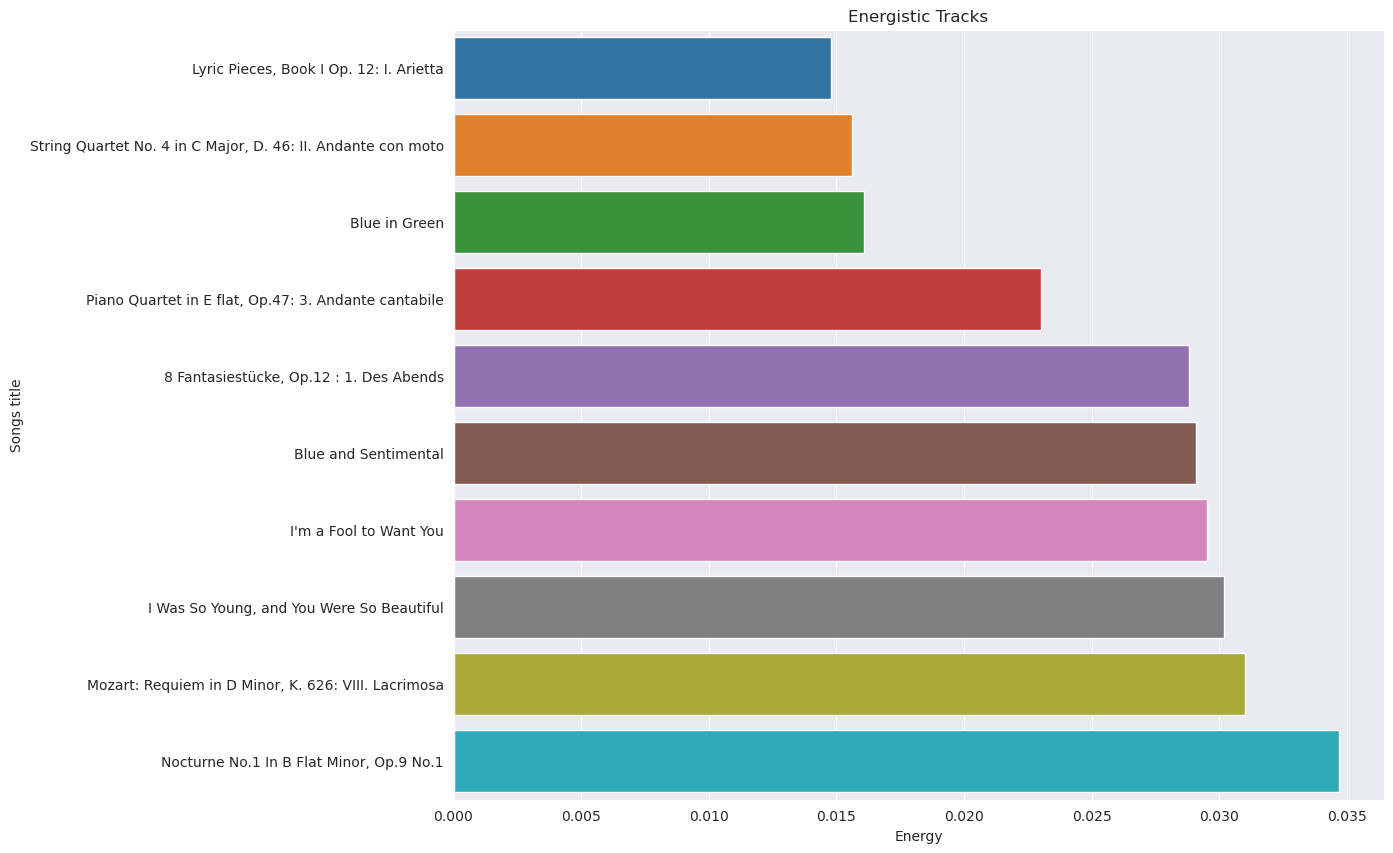

In [32]:
plt.figure(figsize = (12,10))
sns.barplot(x = "energy", y = "song_title", data = top_least_energetic_tracks)
plt.title('Energistic Tracks')
plt.xlabel('Energy')
plt.ylabel('Songs title')
plt.show()


## Danceability Vs Tempo insights

In [58]:
Danceability_insights = df[["danceability", "tempo"]].sort_values(by = "danceability", ascending = False)[:10]
Danceability_insights

,danceability,tempo
1433,0.984,122.003
1901,0.967,117.000
604,0.962,130.684
32,0.959,127.029
1957,0.959,115.266
1136,0.950,121.019
1977,0.947,129.991
138,0.944,136.019
623,0.941,97.524
1591,0.941,110.082


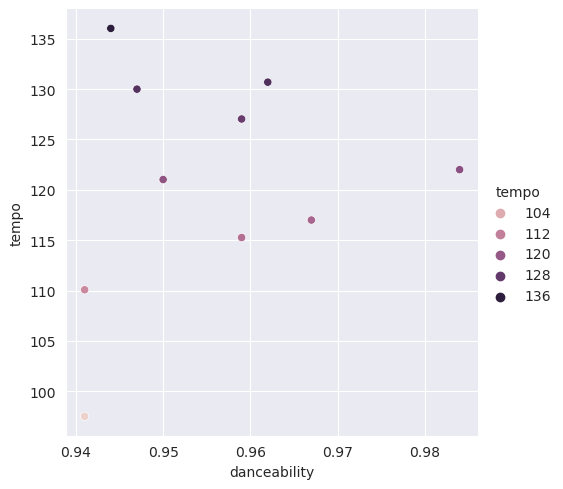

In [66]:
sns.relplot(x = df.danceability, y = df.tempo, data = Danceability_insights, hue = "tempo")

# Danceability of the song is high when tempo is between mid range. Higher the tempo lower the danceability


## Thankyou for reading. Happy Coding! (~iamkd99)